<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>


Thank you for the updates! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Hey Reviewer. Reviewee here. I'll be stealing your code and using this format to communicate to you. Just instead in blue :P

</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Victor! Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- Excluded irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

    
- Trained and compared several models, great!

    
- Tuned hyperparameters. We tune them to identify the hyperparameters that will yield the desired metric value;


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;
  
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,

 
- Check the data for the duplicates after you drop columns; 

    
    
- Let's not drop so many rows with missing values, as these rows contain some other information.

  
    
- According to the task, we are supposed to measure models' training and prediction speed. Would you please measure them separately for each model?



There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are just several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

<center><img src="https://media.tenor.com/vUKtBpKChBUAAAAM/bob-esponja-spongebob.gif" /></center>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
😊    
</div>

## Imports

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import math
import time

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [2]:
#bringing in data
data = pd.read_csv('/datasets/car_data.csv')
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


## Data preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

__Converting time features to datetime type__

In [4]:
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'], format='%d/%m/%Y %H:%M')
data['DateCreated'] = pd.to_datetime(data['DateCreated'], format='%d/%m/%Y %H:%M')
data['LastSeen'] = pd.to_datetime(data['LastSeen'], format='%d/%m/%Y %H:%M')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Mileage            354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  NotRepaired        283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

<span style='color:green'> __It appears all the columns with missing values are categorical. I will check the unique values for each column with missing values__ </span>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Seems to be true. 

</div>

In [6]:
data['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [7]:
data['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [8]:
data['Model'].nunique()

250

In [9]:
data['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [10]:
data['NotRepaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

<span style='color:green'> Since each column that has missing values is categorical data and there is no way to deduce what any of the missing values should be, the data will be filled with string "Unknown". The features above, "VehicleType", "Gearbox", "Model", "FuelType", and "NoReplaced" seem to be features that shouldn't be ignored, but there is plenty of other information in the rows that should not be ignored. </span>

In [11]:
data['VehicleType'] = data['VehicleType'].fillna('Unknown')
data['Gearbox'] = data['Gearbox'].fillna('Unknown')
data['Model'] = data['Model'].fillna('Unknown')
data['FuelType'] = data['FuelType'].fillna('Unknown')
data['NotRepaired'] = data['NotRepaired'].fillna('Maybe')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        354369 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            354369 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              354369 non-null  object        
 7   Mileage            354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           354369 non-null  object        
 10  Brand              354369 non-null  object        
 11  NotRepaired        354369 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Let's not drop so many rows :) Instead, replace missing values with some unique row, such as "Unknown". Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases.

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Roger that. When you put it that way, you make it seem so simple. Check for fixed code above

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Good! 

</div>

I happened to notice a zero in the column of registration month. I will explore if that zero means something

In [12]:
data['RegistrationMonth'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

<AxesSubplot:title={'center':'Number of Occurances of Each Registration Month'}, ylabel='Frequency'>

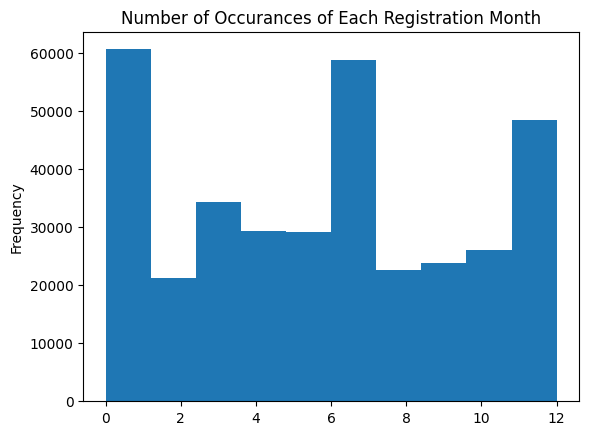

In [13]:
data['RegistrationMonth'].plot(kind='hist', title='Number of Occurances of Each Registration Month', xlabel='Registration Month')
#quick glance at the quantity compared to others

__I am unsure what the zero represents in this column since the numbers 1 through 12 are present. Intuitively, 1-12 would represent Jan-Dec. The number zero occurs more often then some other months. I suppose it's possible that zero means they do not know what month the car was registered. However, that seems peculiar given that this dataset had missing values in other columns. I would think they'd leave this info missing like the others. By inspection of the dataset, the registration month doesn't correspond to any of the months in the other date columns.__

What I will do first is compare the prices to the vehicles with a zero in the Registration column to see if there is any type of pattern.

<AxesSubplot:title={'center':'Price of "Zero Month" Registration'}>

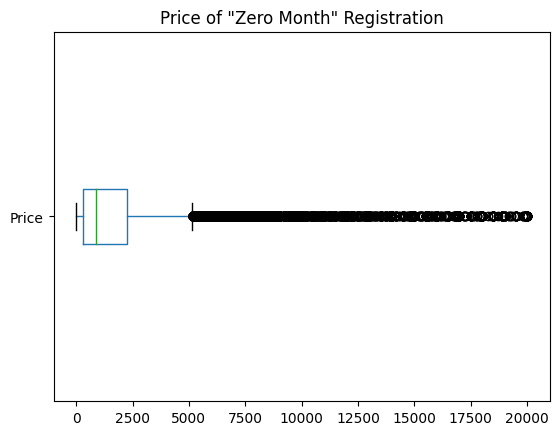

In [14]:
reg_zero = data[data['RegistrationMonth'] == 0]
reg_zero['Price'].plot(kind='box', title='Price of "Zero Month" Registration', xlabel='Price', vert=False)

<AxesSubplot:title={'center':'Price of "Zero Registration" Month'}, ylabel='Frequency'>

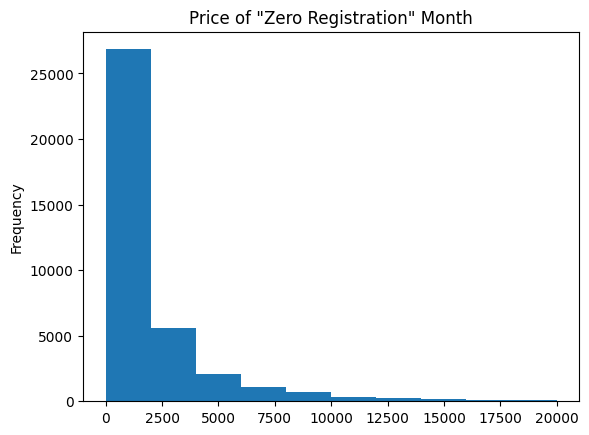

In [15]:
reg_zero['Price'].plot(kind='hist', title='Price of "Zero Registration" Month', xlabel='Price')

From this box plot I can see most of the prices are less than about 5000 euros. There are outlier values going all the way up to about 200k euros. The histrogram shows the data is heavily right skewed. All in all, I cannot conclude anything about the "zero registration" months' prices.

With that being said, I will leave them in. They must mean something behind the scenes since they weren't missing values.

<span style='color:blue'> __Time to check for duplicates.__ </span>

In [16]:
data.duplicated().sum()

262

In [17]:
data[data.duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
14266,2016-03-21 19:06:00,5999,small,2009,manual,80,polo,125000,5,petrol,volkswagen,no,2016-03-21,0,65529,2016-04-05 20:47:00
27568,2016-03-23 10:38:00,12200,bus,2011,manual,125,zafira,40000,10,gasoline,opel,no,2016-03-23,0,26629,2016-04-05 07:44:00
31599,2016-04-03 20:41:00,4950,wagon,2003,auto,170,e_klasse,150000,4,gasoline,mercedes_benz,no,2016-04-03,0,48432,2016-04-05 21:17:00
33138,2016-03-07 20:45:00,10900,convertible,2005,auto,163,clk,125000,5,petrol,mercedes_benz,no,2016-03-07,0,61200,2016-03-21 03:45:00
43656,2016-03-13 20:48:00,4200,sedan,2003,manual,105,golf,150000,10,gasoline,volkswagen,no,2016-03-13,0,14482,2016-03-13 20:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349709,2016-04-03 20:52:00,700,small,1999,manual,60,ibiza,150000,12,petrol,seat,yes,2016-04-03,0,6268,2016-04-05 21:47:00
351555,2016-03-26 16:54:00,3150,bus,2003,manual,86,transit,150000,11,gasoline,ford,no,2016-03-26,0,96148,2016-04-02 07:47:00
352384,2016-03-15 21:54:00,5900,wagon,2006,manual,129,3er,150000,12,petrol,bmw,no,2016-03-15,0,92526,2016-03-20 21:17:00
353057,2016-03-05 14:16:00,9500,small,2013,manual,105,ibiza,40000,5,petrol,seat,no,2016-03-04,0,61381,2016-04-05 19:18:00


<span style='color:red'> __So if there's a duplicate, because they hve the same dates and times, they are for sure the same exact vehicle. They are truly not needed__ </span>

In [18]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data.duplicated().sum()

0

Clear for takeoff

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Thank you for the heads up about the duplicates. Slipped my mind

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Glad to help! 
</div>

<center><img src="https://64.media.tumblr.com/9926251f82facda4bc0623b3d993e286/68860c738c034350-b9/s540x810/87fe6e9911315dc94013a4dcb32563237b0474da.gif" /></center>

## Model training

In [19]:
cat_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'] #categorical features that will be used
droppies = ['Price', 'DateCrawled', 'DateCreated', 'LastSeen', 'RegistrationMonth', 'RegistrationYear', 'PostalCode', 'NumberOfPictures'] #the columns to be dropped features

Columns that are dates will be excluded from the features because they are in reference to activity for an online profile. That being said, it does not have anything to do with the physical car itself.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed! We don't need these columns. 
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
- `DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.


    
- Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 

    
    
- You can then drop `RegistrationMonth`, `RegistrationYear`, `PostalCode` and `NumberOfPictures`. It will significantly simplify the training process. 


- Another option is to drop `VehicleType` and `Brand`, since we have `Model` that should reflect both. 



- Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are some other rare fuel types that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 

</div><div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
   
- After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same. Before we split the data, we need to make sure that the dataframe without `'DateCrawled', 'DateCreated', 'LastSeen'` columns does not have any duplicates. Please note that we should include Price here.



- Are there any outliers in the data?  Please call the `describe` method and display charts. Drop abnormal values if they exist. Hint: `price` and `power` columns definitely have outliers. Look at their lower and upper boundaries. 
</div>

<div style="border: 5px dashed blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Cool, thanks for the advice and critique. It makes a lot of sense to recheck for duplicates and whatnot. I'll surely impliment it below at some point. I'm going to try and fit it in just right in my code

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Good! :)


</div>

__Establishing features, targets, training and test sets.__

In [20]:
features = data.drop(droppies, axis=1)
target = data['Price']

In [21]:
features.duplicated().sum()

247363

__Sheesh! Look at all these duplicates!__ That's pushing the entire dataset

These will be dropped for efficient model training

In [22]:
dupe_index = features[features.duplicated()].index #this will be used to keep the features and target indices the same when dropping them
dupe_index

Int64Index([   146,    203,    211,    264,    309,    331,    376,    399,
               401,    415,
            ...
            354091, 354092, 354093, 354094, 354095, 354096, 354097, 354101,
            354103, 354105],
           dtype='int64', length=247363)

In [23]:
target = target.drop(dupe_index)
target = target.reset_index(drop=True)
features = features.drop_duplicates()
features = features.reset_index(drop=True)
features.duplicated().sum()

0

In [24]:
(features.index == target.index).sum() #checking if they are all true

106744

In [25]:
target #checking length of series to confirm

0           480
1         18300
2          9800
3          1500
4          3600
          ...  
106739     5250
106740     3200
106741        0
106742     1199
106743     3400
Name: Price, Length: 106744, dtype: int64

<span style='color:green'> __Confirmed!__ </span>

In [26]:
#want a 60:20:20 split for training, validation, and test sets

features_intermediate, features_test, target_intermediate, target_test = train_test_split(features, target, test_size=0.2, random_state=616)
#first 80:20
#intermediate is just used for the intermediate step before the final 3 parts

features_train, features_valid, target_train, target_valid = train_test_split(features_intermediate, target_intermediate, test_size=0.25, random_state=616)
#25% of 0.8 is 0.2

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good job!     
</div>

### CatBoostRegressor

In [27]:
learning_rates = [0.01, 0.1, 0.3] #some learning rates to test
iterations_list = [100, 500, 1000] #some interations to test

for lr in learning_rates:
    for iteration in iterations_list: #double for loop to test with each combination of rates and interations
        model = CatBoostRegressor(
            learning_rate=lr,
            iterations=iteration,
            random_seed=42
        )

        start_time_cb = time.time()
        model.fit(
            features_train, 
            target_train,
            cat_features=cat_columns,
            eval_set=(features_valid, target_valid),
            early_stopping_rounds=20,
            verbose=False
        )
        end_time_cb = time.time()

        duration = end_time_cb - start_time_cb
        
        print(f"Learning rate: {lr}, Iterations: {iteration}")
        print(f"Validation RMSE: {model.get_best_score()['validation']['RMSE']}")
        print("Best iteration:", model.get_best_iteration())
        print(f"Training Time: {duration} units", "\n")

Learning rate: 0.01, Iterations: 100
Validation RMSE: 3763.281548559696
Best iteration: 99
Training Time: 1.220231294631958 units 

Learning rate: 0.01, Iterations: 500
Validation RMSE: 3134.8179720792054
Best iteration: 499
Training Time: 14.026788711547852 units 

Learning rate: 0.01, Iterations: 1000
Validation RMSE: 3048.41233541598
Best iteration: 999
Training Time: 27.199621438980103 units 

Learning rate: 0.1, Iterations: 100
Validation RMSE: 3070.4055317816737
Best iteration: 99
Training Time: 1.1852021217346191 units 

Learning rate: 0.1, Iterations: 500
Validation RMSE: 2902.943342859838
Best iteration: 499
Training Time: 14.2210054397583 units 

Learning rate: 0.1, Iterations: 1000
Validation RMSE: 2852.2201400131876
Best iteration: 998
Training Time: 29.36406421661377 units 

Learning rate: 0.3, Iterations: 100
Validation RMSE: 2983.6703559010202
Best iteration: 99
Training Time: 1.20387601852417 units 

Learning rate: 0.3, Iterations: 500
Validation RMSE: 2852.438089476232

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
One of the main goals here is to compare models' training and prediction speed. Would you please estimate them separately for each of the models? 

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Thank you for this. I don't recall learning how to do that in the lessons prior. So thank you for the code you provided later in the notebook. I'll try to figure out how to use it.

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Correct! 
</div>

In [28]:
print(2852.22 / target_valid.mean())

0.5870223141485799


<span style='color:blue'> __After testing this model, I had a lowest RMSE score of about 2852.22. That value is over 58% of the mean of the values it was acquired from. Before moving on to another model I will try to improve the model.__ </span>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
I recommend removing them all above and check for the duplicates once. </div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good idea! 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
We should note, however, that a car can be registered several times, so we cannot identify its age. 

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
I was working with Dot. It told me about the age thing. ugh!

</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Doon't forget to check for the duplicates.
</div>


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, it happens :) 
</div>


__I am going to add more learning rates and iterations in between the values I already had. In addition to that, I will create a list of different tree depths for the booster to work with. This will take longer but perhaps give better results.__

In [29]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3] #editing learning rate list
iterations_list = [100, 150, 200, 250, 300, 350, 400, 450, 500] #editing iterations list 
cat_depth = [2, 4, 6, 8, 10] #introducing new list to experiment with another hyper parameter

#for lr in learning_rates:
#    for iteration in iterations_list:
#        for depth in cat_depth:    
#            model = CatBoostRegressor(
#                learning_rate=lr,
#                iterations=iteration,
#                max_depth = depth,
#                random_seed=42
#            )
#
#            start_time = time.time()
#            model.fit(
#                features_train, 
#                target_train,
#                cat_features=cat_columns,
#                eval_set=(features_valid, target_valid),
#                early_stopping_rounds=20,
#                verbose=False
#                )
#            end_time = time.time()
#
#            duration = end_time - start_time
#        
#            print(f"Learning rate: {lr}, Iterations: {iteration}, Depth: {depth}")
#            print(f"Validation RMSE: {model.get_best_score()['validation']['RMSE']}")
#            print("Best iteration:", model.get_best_iteration())
#            print(f"Time to train: {duration} units", "\n")

<div class="alert alert-block alert-info">
    Hi reviewer! I am going to save you the time from running the code in the cell above and just inform you of my results. This took very long because I totally overlooked the FCP and figured out I had 225 possible match ups whilst it was running.
</div>

So after that long process, I was able to get my RMSE down to about 2823.69 with two different combinations of hyperparameters. However, a learning rate of 0.3, iteration of 500, and a tree depth of 8 took less time. It took 17.91 units. I am beginning to think an RMSE value in the 2 thousands is reasonable given that our target units reach as high as 20,000.

<span style='color:blue'> But, let's try other models to be sure. </span>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Understood! Yes, the code looks correct. 

</div>


<span style='color:green'> __Next up, I am going to try Decision Tree and Random Forest Regression.__ </span>

### Decision Tree Model

Before training these models, I need to change the categorical columns to numerical labels myself. I'll do one hot encoding by getting dummy varibles for the categorical columns.

In [30]:
features_ohe = pd.get_dummies(features, drop_first=True) #avoiding dummy trap by setting drop_first to true

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories.
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]).



    
- Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
   



    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

    
    
    
For instance, you can use `Ordinal` for Forest and Tree, `OneHotEncoder` for Lin. Regression and categorical data types for boosting models.
</div>



<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Noted :)

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
😊
</div>

In [31]:
#target is still the same

#reassigning features to be from one hot encoded data
features_ohe_intermediate, features_ohe_test, target_intermediate, target_test = train_test_split(features_ohe, target, test_size=0.2, random_state=616)

features_ohe_train, features_ohe_valid, target_train, target_valid = train_test_split(features_ohe_intermediate, target_intermediate, test_size=0.25, random_state=616)

In [33]:
#creating for loop to find the best tree length
best_depth = 0
best_rmse = 10000
stt = 0 #these stand for start time train
ett = 0 #end time train
stp = 0 #start time predict
etp = 0 #end time predict
#they are used to record the times spent at the specific best model

for depth in range(1,7):
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)

    start_time_train = time.time()
    model_dt.fit(features_ohe_train, target_train)
    end_time_train = time.time()

    start_time_predict = time.time()
    predicted_dt = model_dt.predict(features_ohe_valid)
    end_time_predict = time.time()
    
    rmse = mean_squared_error(target_valid, predicted_dt)**0.5
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth
        stt = start_time_train
        ett = end_time_train
        stp = start_time_predict
        etp = end_time_predict

duration_train = ett - stt
duration_pred = etp - stp

print(f"Best RMSE: {best_rmse}")
print(f"Best Depth: {best_depth}")
print(f"Training time: {duration_train} units, Prediction Time: {duration_pred} units")

Best RMSE: 3533.9598469170264
Best Depth: 6
Training time: 0.4662513732910156 units, Prediction Time: 0.022653818130493164 units


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
You have successfully implemented hyperparameters tuning, well done!     
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Don't forget to estimate time. You can do it as follows: 


```python
start_time = time.time()
model.fit(X_train, y_train)
end_time1 = time.time()  


start_time = time.time()
model.predict(X_valid, y_valid)
end_time2 = time.time()  

```

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b>   Reviewee's comment </b>
    
Thank you again for this :D

</div>

__Ok so this is not good. Before moving to the next model type, I want to scale the Mileage values to see if that helps.__

In [37]:
to_be_scaled = ['Mileage', 'Power']

scaler = StandardScaler()
scaler.fit(features_ohe_train[to_be_scaled])

features_ohe_train[to_be_scaled] = scaler.transform(features_ohe_train[to_be_scaled])
features_ohe_valid[to_be_scaled] = scaler.transform(features_ohe_valid[to_be_scaled])

/tmp/ipykernel_665/2250241540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_ohe_train[to_be_scaled] = scaler.transform(features_ohe_train[to_be_scaled])
/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_665/2250241540.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you scale data after you split it to avoid data leakage. 

</div>

RUN IT BACK!! 

In [38]:
best_depth = 0
best_rmse = 10000
stt = 0
ett = 0 
stp = 0 
etp = 0


for depth in range(1,7):
    model_dt = DecisionTreeRegressor(random_state=616, max_depth=depth)

    start_time_train = time.time()
    model_dt.fit(features_ohe_train, target_train)
    end_time_train = time.time()

    start_time_predict = time.time()
    predicted_dt = model_dt.predict(features_ohe_valid)
    end_time_predict = time.time()
    
    rmse = mean_squared_error(target_valid, predicted_dt)**0.5
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth
        stt = start_time_train
        ett = end_time_train
        stp = start_time_predict
        etp = end_time_predict

duration_train = ett - stt
duration_pred = etp - stp

print(f"Best RMSE: {best_rmse}")
print(f"Best Depth: {best_depth}")
print(f"Training time: {duration_train} units, Prediction Time: {duration_pred} units")

Best RMSE: 3533.9598469170264
Best Depth: 6
Training time: 0.4774658679962158 units, Prediction Time: 0.02301764488220215 units


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Correct! 
</div><div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Here and below, we also need to calculate time. 

</div>

__Alright, that's the exact same thing. The Decision Tree doesn't seem to be the best model for this. Up next, the notorious Random Forest!__

In [39]:
#establishing variables to be changed throughout the loop
best_rf_depth = 0 
best_est = 0
best_rf_result = 10000

stt = 0
ett = 0
stp = 0
etp = 0

for est in range(10, 51, 10):
    for depth in range(1,11):
        model_rf = RandomForestRegressor(random_state=616, n_estimators=est, max_depth=depth)
        
        start_time_train = time.time()
        model_rf.fit(features_ohe_train, target_train)
        end_time_train = time.time()

        start_time_pred = time.time()
        predicted_rf = model_rf.predict(features_ohe_valid)
        end_time_pred = time.time()
        
        result = mean_squared_error(target_valid, predicted_rf)**0.5
        if result < best_rf_result:
            best_result = result
            best_est = est
            best_depth = depth
            stt = start_time_train
            ett = end_time_train
            stp = start_time_pred
            etp = end_time_pred

train_time = ett - stt
pred_time = etp - stp

print(f"Best Number of Estimators: {best_est}")
print(f"Best Depth: {best_depth}")
print(f"Result: {best_result}")
print(f"Time to train: {train_time} units, Time to predict: {pred_time} units")

Best Number of Estimators: 50
Best Depth: 10
Result: 3239.9561300754754
Time to train: 20.357024431228638 units, Time to predict: 0.09542608261108398 units


An RMSE value of about 3239.96, using a depth of 10 and 50 estimators.

<span style='color:red'> __This is less than the Decision Tree result but more than the CatBoost__ </span>

Let's check how a Linear Regression Model would perform to gauge how our models have been doing in comparison

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Good results actually. 
</div>

In [42]:
model_lr = LinearRegression()

start_lr = time.time()
model_lr.fit(features_ohe_train, target_train)
end_lr = time.time()

start_lr_p = time.time()
predicted_lr = model_lr.predict(features_ohe_valid)
end_lr_p = time.time()

result_lr = mean_squared_error(target_valid, predicted_lr)**0.5

print(f"Linear Regression Result: {result_lr}")
print(f"Time to train: {end_lr - start_lr} units, Time to predict: {end_lr_p - start_lr_p} units")

Linear Regression Result: 3690.2937282149474
Time to train: 2.137799024581909 units, Time to predict: 0.019021034240722656 units


<span style='color:green'> __A RMSE of about 3690.29. So far all of our models have performed better than that, which is a good sign.__ </span>

### Stochastic Gradient Descent Linear Regression (SGD)

In [43]:
model3 = SGDRegressor(random_state=616) #creating instance of model

start_sgd = time.time()
model3.fit(features_ohe_train, target_train) #fitting the numeric training sets
end_sgd = time.time()

start_sgd_p = time.time()
predictions3 = model3.predict(features_ohe_valid) #predicted
end_sgd_p = time.time()


rmse3 = mean_squared_error(target_valid, predictions3)**0.5

print(f"RMSE: {rmse3}")
print(f"Time to train: {end_sgd - start_sgd} units, Time to predict: {end_sgd_p - start_sgd_p} units")

RMSE: 3705.6554453308413
Time to train: 5.935527086257935 units, Time to predict: 0.01704692840576172 units


<span style='color:red'> __Pretty high in comparison to others__ </span>

<span style='color:blue'> I'm going to give one more model a try. A LightGBM model </span>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Yes, it requires a thorough tuning.</div>

### LightGBM Regression

In [45]:
model_lgb = lgb.LGBMRegressor(random_state=616) #lets try keeping everything as a default first except the random state

In [46]:
start_lgb = time.time()
model_lgb.fit(features_ohe_train, target_train) #needed the OHE data because it wouldn't accept the categorical data
end_lgb = time.time()

start_lgb_p = time.time()
predicted_lgb = model_lgb.predict(features_ohe_valid) #predicting the validation set
end_lgb_p = time.time()

rmse_lgb = mean_squared_error(target_valid, predicted_lgb)**0.5 #calculating RMSE

print(f"RMSE Result for LightGBM Model: {rmse_lgb}")
print(f"Time to train: {end_lgb - start_lgb} units, Time to Predict: {end_lgb_p - start_lgb_p} units")

RMSE Result for LightGBM Model: 2994.6771247163692
Time to train: 0.9516007900238037 units, Time to Predict: 0.18448781967163086 units


__Ok this isn't too bad given some of the other results in the 3000s. It still isn't better than the CatBoost Model.__

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Well done! 
</div>

## Model analysis

After testing many models to help predict the price of a car at Rusty Bargain, it appears the best model to use is a CatBoost Regressor model. From my experiments, it needs a Learning Rate of 0.3, Iterations should be 500, and the tree depth should be 8. Let's test it out on the test set.

In [48]:
model_final = CatBoostRegressor(
    learning_rate=0.3,
    iterations=500,
    max_depth=8,
    random_seed=42
)

stf = time.time()
model_final.fit(features_train,
          target_train,
          cat_features=cat_columns,
          eval_set=(features_valid, target_valid),
          early_stopping_rounds=20,
          verbose=False
         )
etf = time.time()

start_prediction = time.time()
predictions_final = model_final.predict(features_test)
end_prediction = time.time()

rmse_final = mean_squared_error(target_test, predictions_final)**0.5

print(f"Final RMSE Value for Test Set: {rmse_final}")
print(f"Time to train {etf - stf} units, Time to predict: {end_prediction - start_prediction} units")

Final RMSE Value for Test Set: 2754.45836249269
Time to train 17.644738912582397 units, Time to predict: 0.0762486457824707 units


<span style='color:green'> __An RMSE even lower than the validation set! Success!__
The time also is not too bad.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>

    
Correct, we choose the best model (it's one model or two models if their errors are quite similar) and run the final test using the test subset to evaluate its generalization ability. 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- When choosing the best model, we have to consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.



- You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 
</div>

## Conclusion

Rusty Bargain needs to use a CatBoost Regressor for their model. Even if there is some unknown combination of hyperparameters that can get the RMSE even lower than my results, based on my experiments, CatBoost is doing the best.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Excellent! 
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


    
Great conclusion! This is a solid final summary with comparison across models. 
    
    
</div>    
  
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it if needed. 

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed